In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import corner

from elisa import ElisaClusterInference

elisa_inference = ElisaClusterInference()

# Download Isochrone Grid

In [2]:
iso_grid = elisa_inference.download_isochrones(
    logage_range=(7.0, 10.0, 0.2),
    MH_range=(-2.5, 1.0, 0.25),
    photsys='gaiaEDR3',
    output_dir='../isochrone_data',
    output_name='parsec_gaia_test',
    save_file=True
)

Grid size: 16 ages x 15 metallicities = 240 isochrones

Querying http://stev.oapd.inaf.it/cgi-bin/cmd...
Retrieving data...
Download complete! Shape: (88247, 31)

Grid summary:
  Total rows: 88,247
  Unique log(age) values: 16
  Unique [M/H] values: 13
  Mass range: 0.090 - 20.85 M_sun

Saved to: ../isochrone_data/parsec_gaia_test.parquet (2.1 MB)
Saved to: ../isochrone_data/parsec_gaia_test_metadata.txt



In [2]:
# Alternative: Load a previously saved grid
iso_grid = elisa_inference.load_isochrone_grid('../isochrone_data/parsec_gaia_test.parquet')

# Quick look at the grid structure
print(f"Grid shape: {iso_grid.shape}")
print(f"\nColumns: {list(iso_grid.columns)}")
print(f"\nAge range: [{iso_grid['logAge'].min():.2f}, {iso_grid['logAge'].max():.2f}]")
print(f"[M/H] range: [{iso_grid['MH'].min():.2f}, {iso_grid['MH'].max():.2f}]")
print(f"Mass range: [{iso_grid['Mini'].min():.3f}, {iso_grid['Mini'].max():.2f}] M_sun")

Grid shape: (88247, 11)

Columns: ['MH', 'logAge', 'Mini', 'Mass', 'label', 'logTe', 'logg', 'logL', 'Gmag', 'G_BPmag', 'G_RPmag']

Age range: [7.00, 10.00]
[M/H] range: [-2.19, 0.70]
Mass range: [0.090, 20.85] M_sun


### Visualize the Isochrone Grid

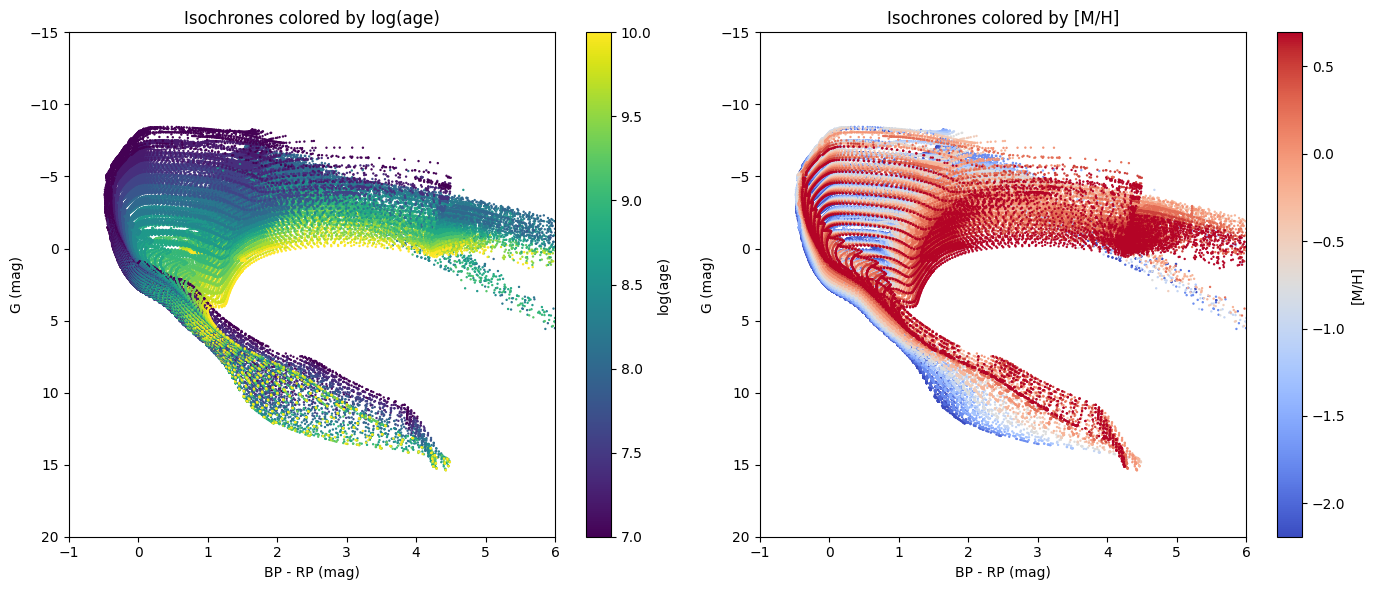

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

scatter1 = axes[0].scatter(iso_grid['G_BPmag'] - iso_grid['G_RPmag'], iso_grid['Gmag'], c=iso_grid['logAge'], cmap='viridis', s=0.5)
axes[0].set_xlabel('BP - RP (mag)')
axes[0].set_ylabel('G (mag)')
axes[0].set_title('Isochrones colored by log(age)')
axes[0].invert_yaxis()
axes[0].set_xlim(-1, 6)
axes[0].set_ylim(20, -15)
plt.colorbar(scatter1, ax=axes[0], label='log(age)')

scatter2 = axes[1].scatter(iso_grid['G_BPmag'] - iso_grid['G_RPmag'], iso_grid['Gmag'], c=iso_grid['MH'], cmap='coolwarm', s=0.5)
axes[1].set_xlabel('BP - RP (mag)')
axes[1].set_ylabel('G (mag)')
axes[1].set_title('Isochrones colored by [M/H]')
axes[1].invert_yaxis()
axes[1].set_xlim(-1, 6)
axes[1].set_ylim(20, -15)
plt.colorbar(scatter2, ax=axes[1], label='[M/H]')

plt.tight_layout()
plt.show()

# Load Observed Data from ElisaQuery

Load the cluster photometry from Alfonso+24 catalog.

**Data columns:**
- `Gmag`: Gaia G-band magnitude
- `BPmag`: Gaia BP-band magnitude  
- `RPmag`: Gaia RP-band magnitude
- `e_Plx`: Parallax error (used to estimate photometric quality)

In [3]:
from elisa.query.data import ElisaQuery

elisa_query = ElisaQuery()

df_clusters, df_members = elisa_query.load_catalog('alfonso-2024', load_members=True)

Using VizieR server: https://vizier.cfa.harvard.edu
Loading clusters and members from Alfonso et al. 2024
Loaded 370 clusters from the alfonso-2024 catalog.
Loaded 87708 members from the alfonso-2024 catalog.


In [4]:
source_ids = df_members[df_members['Cluster'] == 'Melotte_22']['GaiaDR3'].values # Pleiades
#source_ids = df_members[df_members['Cluster'] == 'Blanco_1']['GaiaDR3'].values # Pleiades
print(len(source_ids))

df = elisa_query.gaia_source_id(source_id=source_ids)

print(f"Loaded {len(df)} stars")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()

1130
INFO: Query finished. [astroquery.utils.tap.core]
Query returned 1130 rows.
Loaded 1130 stars

Columns: ['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pm', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al', 'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_params_solved', 'astrometric_primary_flag', 'nu_eff_used_in_astrometry', 'pseudocolour', 'pseudocolour_error', 'ra_pseudocolour_corr', 'dec_pseudocolour_corr', 'parallax_pseudocolour_corr', 'pmra_pseudocolour_corr', 'pmdec_pseudocolour_corr', 'astrometric_matched_

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot
0,1636148068921376768,Gaia DR3 63546038305742720,63546038305742720,1046546941,2016.0,56.010510,0.082556,21.220946,0.060184,6.933622,...,1.0339,1.0113,1.0600,0.6365,0.6223,0.6528,0.4409,0.4318,0.4516,MARCS
1,1636148068921376768,Gaia DR3 63849572235829248,63849572235829248,1637549535,2016.0,57.849549,0.013995,22.113185,0.007832,7.293487,...,0.5526,0.2723,0.6371,0.4228,0.2060,0.4886,0.2248,0.1092,0.2594,PHOENIX
2,1636148068921376768,Gaia DR3 64037588724758400,64037588724758400,1728785661,2016.0,57.633192,0.045208,22.146378,0.029852,6.946839,...,1.0197,1.0030,1.0416,0.6508,0.6400,0.6652,0.4217,0.4151,0.4306,MARCS
3,1636148068921376768,Gaia DR3 64131150292139648,64131150292139648,400062174,2016.0,57.156919,0.022121,22.769114,0.014229,7.232192,...,1.9591,1.9188,2.0216,1.4542,1.4225,1.5039,0.7869,0.7695,0.8154,MARCS
4,1636148068921376768,Gaia DR3 64346276612274816,64346276612274816,168537043,2016.0,55.684889,0.068251,21.853445,0.052290,7.600312,...,1.2475,1.2074,1.2726,0.7687,0.7437,0.7844,0.5235,0.5073,0.5337,MARCS


Number of stars: 1130
G magnitude range: [5.20, 18.98]
BP-RP color range: [-0.40, 3.88]
Estimated error range (G): [0.0130, 0.2904] mag
Median error (G): 0.0579 mag


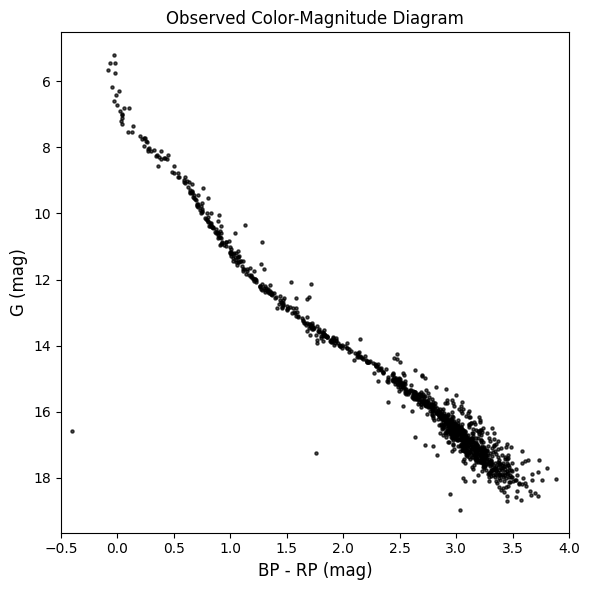

In [5]:
# Extract observed magnitudes - shape (n_stars, 3) for [G, BP, RP]

df.rename(columns={'phot_g_mean_mag': 'Gmag', 'phot_bp_mean_mag': 'BPmag', 'phot_rp_mean_mag': 'RPmag'}, inplace=True)
observed_mags = df[['Gmag', 'BPmag', 'RPmag']].values

print(f"Number of stars: {len(observed_mags)}")
print(f"G magnitude range: [{observed_mags[:, 0].min():.2f}, {observed_mags[:, 0].max():.2f}]")
print(f"BP-RP color range: [{(observed_mags[:, 1] - observed_mags[:, 2]).min():.2f}, "
      f"{(observed_mags[:, 1] - observed_mags[:, 2]).max():.2f}]")


# Estimate photometric errors
# Gaia photometric errors depend on magnitude - brighter stars have smaller errors
# Using approximate formula based on Gaia DR3 performance

# def estimate_gaia_errors(G_mag):
#     """
#     Estimate Gaia photometric errors based on G magnitude.
#     Approximate formula: ~0.003 mag at G=12, ~0.01 mag at G=17, ~0.1 mag at G=20
#     """
#     base_error = 0.003 + 0.001 * 10**((G_mag - 12) / 5)
#     return np.clip(base_error, 0.003, 0.5)

# errors_G = estimate_gaia_errors(observed_mags[:, 0])
# errors_BP = errors_G * 1.2  # BP typically has ~20% larger errors
# errors_RP = errors_G * 1.1  # RP typically has ~10% larger errors

parallax_error = df['parallax_error'].to_numpy()

errors_G = parallax_error
errors_BP = parallax_error
errors_RP = parallax_error

observed_errors = np.column_stack([errors_G, errors_BP, errors_RP])

print(f"Estimated error range (G): [{errors_G.min():.4f}, {errors_G.max():.4f}] mag")
print(f"Median error (G): {np.median(errors_G):.4f} mag")

fig, ax = plt.subplots(figsize=(6, 6))

bp_rp = observed_mags[:, 1] - observed_mags[:, 2]
scatter = ax.scatter(bp_rp, observed_mags[:, 0], c='k', s=5, alpha=0.7)

ax.set_xlabel('BP - RP (mag)', fontsize=12)
ax.set_ylabel('G (mag)', fontsize=12)
ax.invert_yaxis()
ax.set_title('Observed Color-Magnitude Diagram')
ax.set_xlim(-0.5, 4.0)

plt.tight_layout()
plt.show()

# Set Up Log-Posterior and Priors

Now we configure the Bayesian inference by setting priors on each parameter.

ELISA supports two prior types:
- **'gaussian'**: Gaussian priors with (mean, std)
- **'uniform'**: Uniform priors with (low, high)

# Initial parameters

In [6]:
init_logAge = 8.1
init_MH = 0.0       # Solar metallicity
distance = 136.0 # pc
init_dm = 5*np.log10(distance/10)
init_AV = 0.1       # Low extinction

init_parameters = {
    'logAge': init_logAge,
    'MH': init_MH,
    'distance_modulus': init_dm,
    'A_V': init_AV
}

for key, value in init_parameters.items():
    v = str(value) if not 'logAge' in key else str(value) + " -> " + str(round(10**value / 10**6, 1)) + " Myr"
    print(f"{key}: {v}")

logAge: 8.1 -> 125.9 Myr
MH: 0.0
distance_modulus: 5.667694541851088
A_V: 0.1


In [8]:
# Set up the log-posterior with uniform priors
# Priors should bracket reasonable parameter ranges
# priors: (mean, std) for Gaussian prior or (low, high) for uniform

posterior = elisa_inference.setup_logposterior(
    grid=iso_grid,
    observed_mags=observed_mags,
    observed_errors=observed_errors,
    prior_logAge=(6.0, 10.5),       # (low, high) for uniform
    prior_MH=(init_MH, 0.3),            # (mean, std) for gaussian
    prior_dm=(init_dm, 1.0),           # (mean, std) for gaussian
    prior_AV=(init_AV, 0.2),            # (mean, std) for gaussian
    prior_type={'logAge': 'uniform', 'MH': 'gaussian', 'dm': 'gaussian', 'AV': 'gaussian'},
    correct_extinction = False
)

print(f"Number of stars: {posterior.n_stars}")

Building lookup structure...
Grid loaded!
  Age range: [7.00, 10.00]
  [M/H] range: [-2.19, 0.70]
  Mass range: [0.090, 20.85] M_sun
Number of stars: 1130


In [9]:
# Get initial parameter vector
init_params = posterior.get_initial_params(
    logAge_init=init_logAge,
    MH_init=init_MH,
    dm_init=init_dm,
    AV_init=init_AV
)

print(f"Initial parameters:")
print(f"  logAge = {init_params[0]:.2f} ({10**(init_params[0]-6):.1f} Myr)")
print(f"  [M/H]  = {init_params[1]:.2f}")
print(f"  dm     = {init_params[2]:.2f} ({10**(init_params[2]/5 + 1):.0f} pc)")
print(f"  A_V    = {init_params[3]:.2f}")

Initial parameters:
  logAge = 8.10 (125.9 Myr)
  [M/H]  = 0.00
  dm     = 5.67 (136 pc)
  A_V    = 0.10


# Evaluate log-posterior at initial values

In [21]:
init_params

array([8.1       , 0.        , 5.66769454, 0.1       ])

In [23]:
from scipy.optimize import minimize

results_mle = minimize(lambda params: -posterior(params), init_params, method='Nelder-Mead', options={'maxiter': 10000, 'xatol': 1e-4, 'fatol': 1e-4})

In [25]:
for key, value in zip(['logAge', 'MH', 'dm', 'AV'], results_mle.x):
    v = str(value) if not 'logAge' in key else str(value) + " -> " + str(round(10**value / 10**6, 1)) + " Myr"
    print(f"{key}: {v}")

logAge: 7.96991070305036 -> 93.3 Myr
MH: 0.0006115302938599243
dm: 5.546796129708861
AV: 0.09032053836204017


In [26]:
init_params_mle = results_mle.x

log_post_init = posterior(init_params_mle)
print(f"Log-posterior at initial params: {log_post_init:.2f}")

if not np.isfinite(log_post_init):
    print("WARNING: Initial log-posterior is -inf!")
    print("Check that your initial parameters are within the grid and prior bounds.")
else:
    print("Initial parameters are valid.")

Log-posterior at initial params: -7507.09
Initial parameters are valid.


### Diagnostic: Initial Isochrone Fit

Before running MCMC, check that your initial parameters produce a reasonable isochrone.

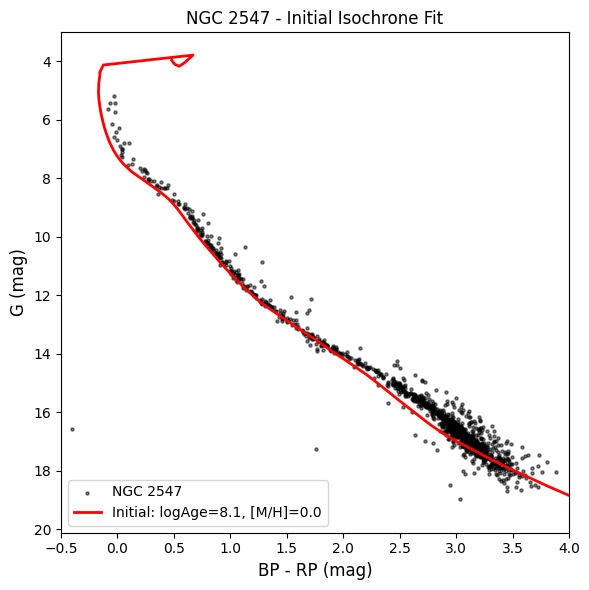


If the isochrone doesn't match the data well, adjust the initial parameters above.


In [27]:
fig, ax = plt.subplots(figsize=(6, 6))

bp_rp_obs = observed_mags[:, 1] - observed_mags[:, 2]
ax.scatter(bp_rp_obs, observed_mags[:, 0], c='k', s=5, alpha=0.5, label='NGC 2547')

masses_iso = np.linspace(0.1, 8.0, 500)
abs_mags_iso = posterior.interpolator.get_magnitudes_vectorized(masses_iso, init_logAge, init_MH)

d = 136.0  # pc
mu = 5 * np.log10(d / 10)
app_mags_iso = abs_mags_iso + mu# + np.array([init_AV, init_AV * 1.2, init_AV * 1.1])  # A_G, A_BP, A_RP

bp_rp_iso = app_mags_iso[:, 1] - app_mags_iso[:, 2]
valid = ~np.isnan(bp_rp_iso)
ax.plot(bp_rp_iso[valid], app_mags_iso[valid, 0], 'r-', lw=2, label=f'Initial: logAge={init_logAge:.1f}, [M/H]={init_MH:.1f}')

ax.set_xlabel('BP - RP (mag)', fontsize=12)
ax.set_ylabel('G (mag)', fontsize=12)
ax.invert_yaxis()
ax.legend(loc='lower left')
ax.set_title('NGC 2547 - Initial Isochrone Fit')
ax.set_xlim(-0.5, 4.0)

plt.tight_layout()
plt.show()

print("\nIf the isochrone doesn't match the data well, adjust the initial parameters above.")

## 7. Run MCMC Sampling

Now we run the MCMC sampler to explore the posterior distribution.

**Parameters to tune:**
- `n_walkers`: Number of walkers (default: 32, must be >= 8 for 4 parameters)
- `n_steps`: Number of MCMC steps (start with 1000, increase for production)

In [28]:
# Run MCMC
sampler = elisa_inference.run_mcmc(
    log_posterior=posterior,
    init_params=init_params_mle,
    n_walkers=32,      # Number of walkers
    n_steps=2000,      # Total steps (increase for production)
    progress=True      # Show progress bar
)

MCMC Setup:
  Parameters: 4 (logAge, MH, dm, AV)
  Walkers: 32
  Steps: 2000
Checking initial positions...
  Valid initial positions: 32/32
Running MCMC...


100%|██████████| 2000/2000 [07:16<00:00,  4.58it/s]


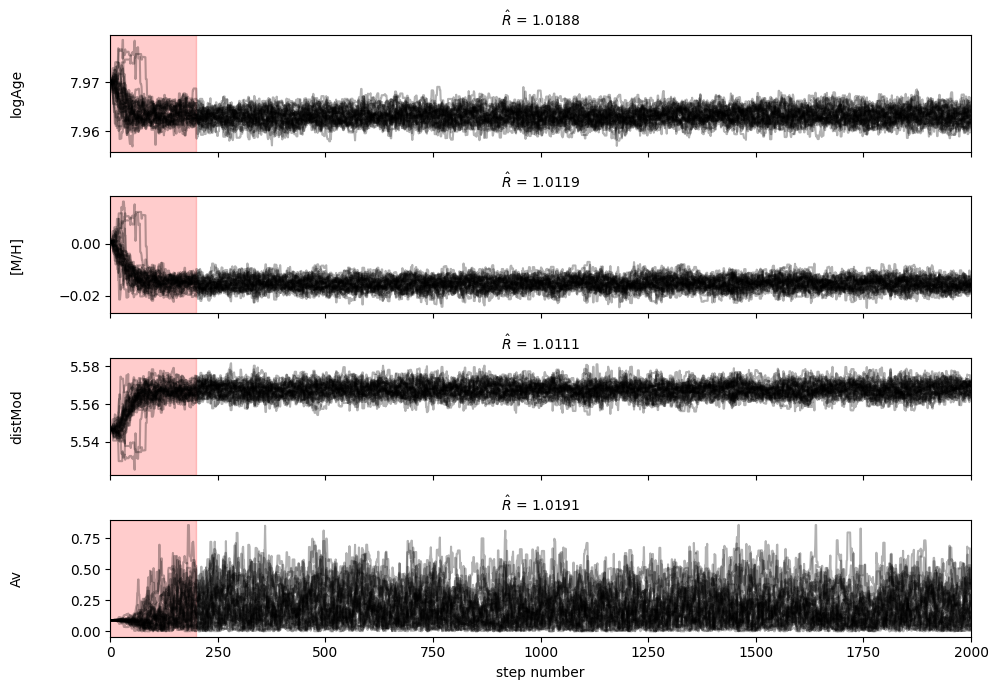

In [46]:
n_burn = 200
flat_samples = sampler.get_chain(discard=n_burn, flat=True)

# Gelman-Rubin needs individual chains: (n_walkers, n_steps, n_params)
chains = sampler.get_chain(discard=n_burn).transpose(1, 0, 2)
R_hat = elisa_inference.get_gelman_rubin(chains)

fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["logAge", "[M/H]", "distMod", "Av"]
for i in range(4):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.axvspan(0, n_burn, alpha=0.2, color='red', label='Burn-in')
    ax.set_title(f"$\\hat{{R}}$ = {R_hat[i]:.4f}", fontsize=10, loc='center')

axes[-1].set_xlabel("step number")
plt.tight_layout()

In [51]:
#tau = sampler.get_autocorr_time()
#tau = sampler.get_autocorr_time(quiet=True)

tau = sampler.get_autocorr_time(quiet=True)
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
flat_samples = sampler.get_chain(discard=burnin, thin=thin, flat=True)

print(f"Autocorrelation times: {tau}")
print(f"Burn-in: {burnin} steps")
print(f"Thinning: {thin} steps")

The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 40;
tau: [46.13562351 49.75945109 54.58788306 48.79705953]


Autocorrelation times: [46.13562351 49.75945109 54.58788306 48.79705953]
Burn-in: 109 steps
Thinning: 23 steps


In [57]:
init_parameters, init_params_mle

({'logAge': 8.1, 'MH': 0.0, 'distance_modulus': 5.667694541851088, 'A_V': 0.1},
 array([7.96991070e+00, 6.11530294e-04, 5.54679613e+00, 9.03205384e-02]))

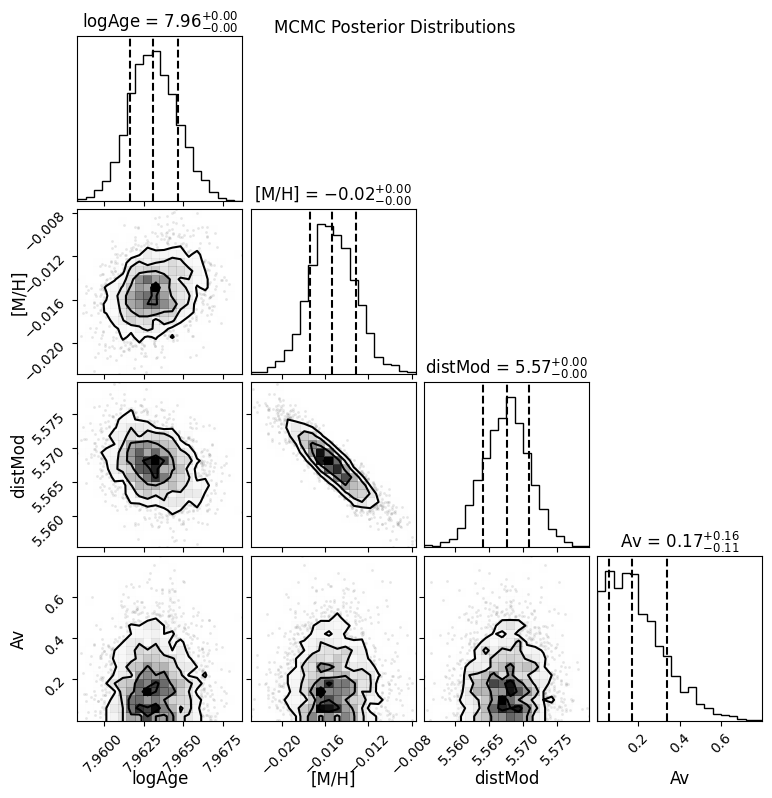

In [58]:
fig = corner.corner(flat_samples, labels=labels, quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 12})
fig.suptitle("MCMC Posterior Distributions", fontsize=12)
fig.set_size_inches(8, 8)

In [55]:
# Get results summary
results = elisa_inference.get_results_summary(flat_samples)

CLUSTER PARAMETER RESULTS
  logAge  : 7.9631 (+0.0015 / -0.0015)
  MH      : -0.0154 (+0.0022 / -0.0020)
  dm      : 5.5677 (+0.0032 / -0.0036)
  AV      : 0.1714 (+0.1647 / -0.1136)

Derived quantities:
  Distance: 129.9 pc
  Age: 91.9 Myr


### 8.4 Isochrone Fit Visualization

Plot the observed CMD with isochrones drawn from the posterior.

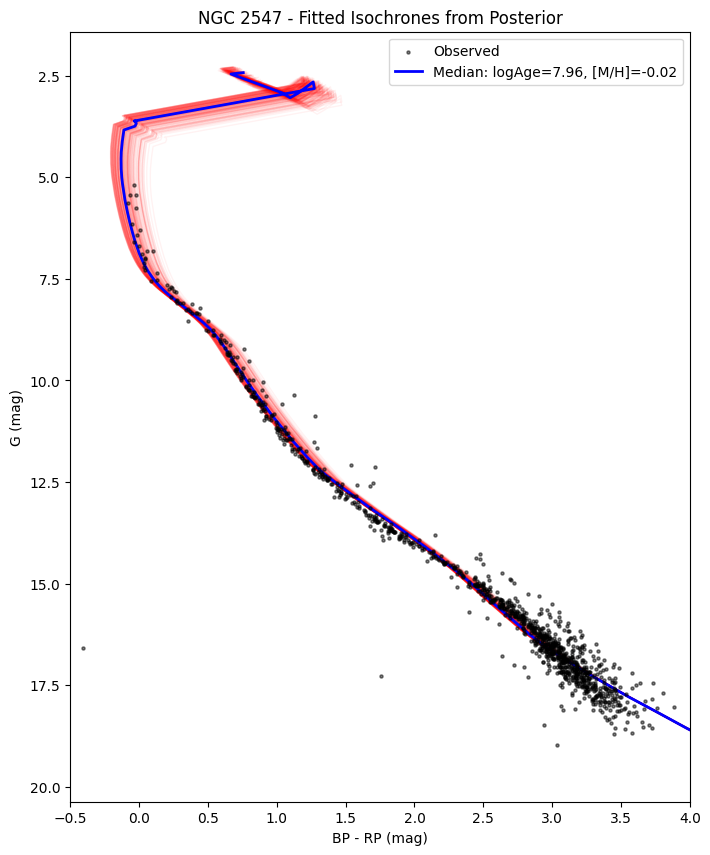

In [56]:
fig, ax = elisa_inference.plot_isochrone_fit(flat_samples=flat_samples, observed_mags=observed_mags, n_draws=200)  # Number of posterior samples to plot

ax.set_xlim(-0.5, 4.0)
ax.set_title('NGC 2547 - Fitted Isochrones from Posterior')
plt.show()

In [63]:
results_df = pd.DataFrame({
    'parameter': ['logAge', 'MH', 'dm', 'AV'],
    'median': [results['logAge']['median'], results['MH']['median'], 
               results['dm']['median'], results['AV']['median']],
    'err_low': [results['logAge']['err_low'], results['MH']['err_low'],
                results['dm']['err_low'], results['AV']['err_low']],
    'err_high': [results['logAge']['err_high'], results['MH']['err_high'],
                 results['dm']['err_high'], results['AV']['err_high']]
})

results_df

,parameter,median,err_low,err_high
0,logAge,8.098336,0.001992,0.001313
1,MH,0.101883,0.002631,0.002704
2,dm,5.603568,0.003653,0.003829
3,AV,0.174231,0.116614,0.168594
